In [ ]:
#project 2
#headline class predection
#Gregory Sylvester
#this project I gathered CNN headlines and try to predict the which page they will land on

!pip install beautifulsoup4
!pip install spacy
import spacy
!python -m spacy download en_core_web_lg

2023-12-07 15:33:31.969823: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 15:33:31.969901: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 15:33:31.969948: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 15:33:33.224777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import cluster
from sklearn import ensemble
from textblob import TextBlob
from sklearn import naive_bayes as nb
from sklearn import decomposition
from sklearn import preprocessing
import sklearn.metrics as metrics
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D


tfidfVect = TfidfVectorizer()

tags = ["/US","/world","/politics","/business","/health","/entertainment","/opinions","/style","/travel","/sport"]
nlp = spacy.load("en_core_web_lg")
URL = "https://www.cnn.com"



In [ ]:
headlines = []
for tag in tags:
  URL = "https://www.cnn.com"+tag
  response = requests.get(URL)
  soup = BeautifulSoup(response.content,'html.parser')
  headlines_org = soup.find_all("span", attrs={'class':"container__headline-text"})
  if not any(headline == m for m in headlines):
    for headline in headlines_org:
      headlines.append([headline.text,tag])



In [ ]:
headlines = np.array(headlines)
headlines_uniques , headlines_indexs = np.unique(headlines[:,0], return_index=True)
headlines = headlines[headlines_indexs,:]

In [ ]:
vectors.shape[0]

658

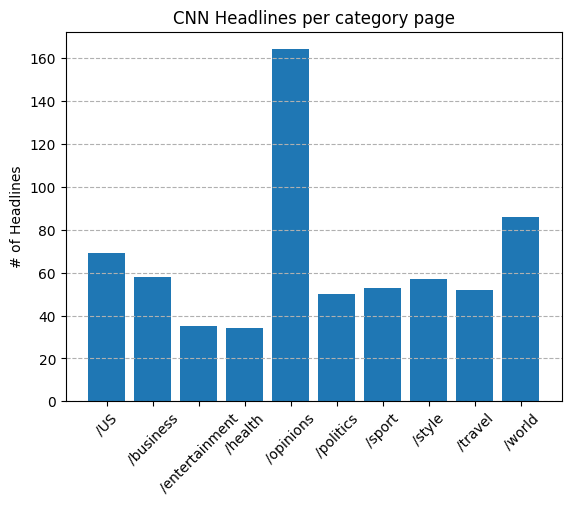

In [ ]:
catagories, cat_counts = np.unique(headlines[:,1],return_counts = True)
plt.bar(catagories, cat_counts)
plt.xticks(catagories, rotation=45)
plt.title("CNN Headlines per category page")
plt.grid(axis="y",linestyle='--')
plt.ylabel("# of Headlines")
plt.show()

In [ ]:
# preprocessing
for i in range(headlines.shape[0]):
  headlines[i,0] = np.char.lower(headlines[i,0])
  headlines[i,0] ="".join([k for k in headlines[i,0] if k not in string.punctuation and k != "'"and k != "‘"and k != "’"])
  print(headlines[i,0])

 a sleeping polar bear and some sociable penguins are among the images shortlisted for the wildlife photographer of the year peoples choice award
10 products you can use to prevent bringing bedbugs home from your next vacation
100 opeds that tell the story of the 2010s
13 climbers killed 10 missing following indonesian volcano eruption
191 year old turtle celebrates birthday
2 people are dead as an atmospheric river pummels the northwest with more than 9 inches of rain and the danger isnt over
2023 will be hottest year on record
2023 will officially be the hottest year on record scientists report
26 voices on why the free press matters
5 things to know for dec 6 presidential race israel floods actors strike drug shortages
5 things to know for dec 7 presidential debate las vegas shooting israel foreign aid cigarettes
6monthold bernedoodle stolen found safe
60 years ago we saw the face of evil
a covid19 vaccine may soon be available for young kids heres what parents should consider
a leb

In [ ]:
def preprocess(text):
  doc = nlp(text)
  lemma_sentance = ""
  for token in doc:
    if token.is_stop:
      continue
    else:
      lemma_sentance = lemma_sentance + str(token.lemma_)+ " "
  return lemma_sentance

In [ ]:
headlines_preprocessed = headlines
for m in range(headlines.shape[0]):
  headlines_preprocessed[m,0] = preprocess(str(headlines[m,0]))
vectors = tfidfVect.fit_transform(headlines_preprocessed[:,0])
print(np.array(vectors[0,:]))

  (0, 220)	0.2735646699633332
  (0, 452)	0.30462745639268624
  (0, 1640)	0.21433133464780393
  (0, 2501)	0.19925262478833627
  (0, 1653)	0.24848597644677084
  (0, 2456)	0.2864568911636047
  (0, 2025)	0.30462745639268624
  (0, 1114)	0.30462745639268624
  (0, 1637)	0.30462745639268624
  (0, 2067)	0.30462745639268624
  (0, 256)	0.2635646863062385
  (0, 1684)	0.30462745639268624
  (0, 2055)	0.2635646863062385


<function matplotlib.pyplot.show(close=None, block=None)>

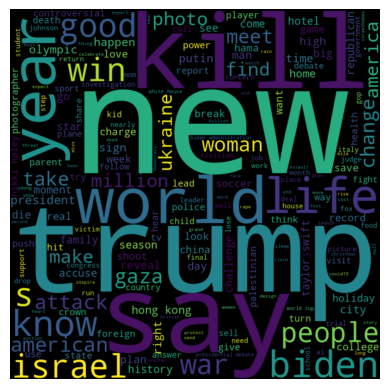

In [ ]:
wordcloud = WordCloud(width=800,height =800,background_color = 'black')
text=""
text = " ".join(headlines_preprocessed[:,0])

instanceWC = wordcloud.generate(text)
plt.imshow(instanceWC, interpolation = 'bilinear')
plt.axis("off")
plt.show

In [ ]:
#word clouds
counter = 0
wordcloud = WordCloud(width=2000,height = 1000,background_color = 'black')
figs, axes = plt.subplots(nrows=len(tags),ncols=1, figsize = (40,80))

for k in tags:
  text = ""

  text = " ".join((headlines_preprocessed[np.where(headlines_preprocessed[:,1] == k),0][0]))
  instanceWC = wordcloud.generate(text)
  axes[counter].imshow(instanceWC, interpolation = 'bilinear')
  axes[counter].axis("off")
  axes[counter].set_title(k)
  counter +=1
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(vectors, headlines_preprocessed[:,1], test_size = .3,random_state = 22)

In [ ]:
def fitReport(model):
  model.fit(x_train,y_train)
  crossvalidation = StratifiedKFold(n_splits=10, shuffle =True, random_state =22)
  y_pred = cross_val_predict(model,x_test,y_test)
  print(metrics.classification_report(y_test,y_pred,zero_division=1))


def fitReport2(model):
  model.fit(x_train_2,y_train_2)
  crossvalidation = StratifiedKFold(n_splits=10, shuffle =True, random_state =22)
  y_pred_2 = cross_val_predict(model,x_test_2,y_test_2)
  print(metrics.classification_report(y_test_2,y_pred_2,zero_division=1))
  return y_pred_2

In [ ]:
model_b = nb.BernoulliNB(alpha = .04,binarize = .27)
model_b.fit(x_train,y_train)
fitReport(model_b)

                precision    recall  f1-score   support

           /US       0.14      0.20      0.16        20
     /business       0.43      0.35      0.39        17
/entertainment       0.60      0.23      0.33        13
       /health       1.00      0.09      0.17        11
     /opinions       0.47      0.64      0.54        55
     /politics       0.25      0.13      0.17        15
        /sport       0.00      0.00      0.00        14
        /style       0.18      0.29      0.22        14
       /travel       0.12      0.14      0.13        14
        /world       0.21      0.20      0.20        25

      accuracy                           0.31       198
     macro avg       0.34      0.23      0.23       198
  weighted avg       0.34      0.31      0.29       198



In [ ]:
model_m = nb.MultinomialNB(alpha = .03)
model_m.fit(x_train,y_train)
fitReport(model_m)



                precision    recall  f1-score   support

           /US       0.25      0.20      0.22        20
     /business       0.47      0.41      0.44        17
/entertainment       0.44      0.31      0.36        13
       /health       0.25      0.09      0.13        11
     /opinions       0.45      0.62      0.52        55
     /politics       0.19      0.20      0.19        15
        /sport       0.00      0.00      0.00        14
        /style       0.18      0.21      0.19        14
       /travel       0.18      0.14      0.16        14
        /world       0.27      0.32      0.29        25

      accuracy                           0.33       198
     macro avg       0.27      0.25      0.25       198
  weighted avg       0.31      0.33      0.31       198



In [ ]:

fitReport(model)


NameError: ignored

In [ ]:
model_f = RandomForestClassifier(class_weight="balanced",max_features=10,max_depth=10,criterion="entropy",n_estimators = 1000,min_samples_split =3)
model_f.fit(x_train,y_train)
fitReport(model_f)

                precision    recall  f1-score   support

           /US       0.30      0.15      0.20        20
     /business       0.67      0.24      0.35        17
/entertainment       0.80      0.31      0.44        13
       /health       0.00      0.00      0.00        11
     /opinions       0.38      0.82      0.52        55
     /politics       0.00      0.00      0.00        15
        /sport       0.00      0.00      0.00        14
        /style       0.25      0.21      0.23        14
       /travel       0.12      0.07      0.09        14
        /world       0.35      0.32      0.33        25

      accuracy                           0.34       198
     macro avg       0.29      0.21      0.22       198
  weighted avg       0.32      0.34      0.29       198



In [ ]:
model_t = DecisionTreeClassifier(class_weight = "balanced",criterion="entropy",min_samples_split=2)
model_t.fit(x_train,y_train)
fitReport(model_t)

                precision    recall  f1-score   support

           /US       0.15      0.10      0.12        20
     /business       0.00      0.00      0.00        17
/entertainment       0.20      0.08      0.11        13
       /health       0.00      0.00      0.00        11
     /opinions       0.38      0.38      0.38        55
     /politics       0.29      0.27      0.28        15
        /sport       0.00      0.00      0.00        14
        /style       0.07      0.43      0.12        14
       /travel       0.00      0.00      0.00        14
        /world       0.38      0.12      0.18        25

      accuracy                           0.19       198
     macro avg       0.15      0.14      0.12       198
  weighted avg       0.21      0.19      0.18       198



In [ ]:
ensemble_model = ensemble.VotingClassifier(estimators=[
    ('bernoulli', model_b),
    ('mulitnomial', model_m),
    ('decision_tree', model_t),
    ('random_forest', model_f)], voting ="soft")

fitReport(ensemble_model)

                precision    recall  f1-score   support

           /US       0.06      0.05      0.06        20
     /business       0.60      0.18      0.27        17
/entertainment       0.67      0.15      0.25        13
       /health       0.00      0.00      0.00        11
     /opinions       0.37      0.44      0.40        55
     /politics       0.38      0.33      0.36        15
        /sport       0.17      0.07      0.10        14
        /style       0.06      0.29      0.10        14
       /travel       0.33      0.07      0.12        14
        /world       0.31      0.20      0.24        25

      accuracy                           0.23       198
     macro avg       0.30      0.18      0.19       198
  weighted avg       0.31      0.23      0.24       198



In [ ]:
num_clusters = 5
kmeans = cluster.KMeans(n_clusters=num_clusters, random_state=22)
kmeans.fit(vectors)
cluster_labels = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NameError: ignored

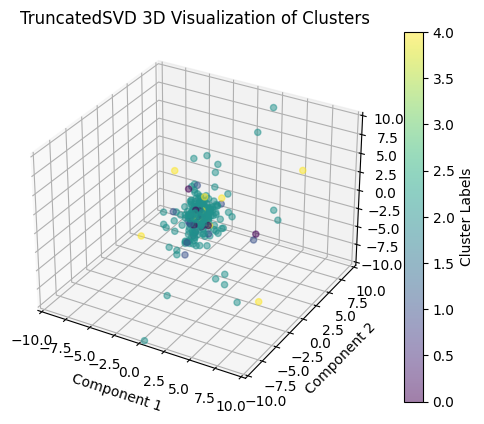

In [ ]:
scaler = preprocessing.StandardScaler(with_mean=False)
vectors_standardized = scaler.fit_transform(vectors)
svd = decomposition.TruncatedSVD(n_components=3)
vectors_svd_3d = svd.fit_transform(vectors_standardized)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(vectors_svd_3d[:, 0], vectors_svd_3d[:, 1], vectors_svd_3d[:, 2], c=cluster_labels, cmap='viridis', alpha=0.5)

ax.set_title('TruncatedSVD 3D Visualization of Clusters')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

fig.colorbar(scatter, ax=ax, label='Cluster Labels')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
plt.show()

In [ ]:
from collections import Counter


figs2, axes2 = plt.subplots(nrows=num_clusters, ncols=1, figsize=(40, 80))
counter = 0

all_text = " ".join([" ".join(headline) for headline in headlines_preprocessed[:, 0]])
word_counter = Counter(all_text.split())
most_common_words = [word for word, _ in word_counter.most_common(5)]

for k in range(num_clusters):

    text = " ".join(headlines_preprocessed[np.where(cluster_labels == k), 0][0])


    text = " ".join([word for word in text.split() if word not in most_common_words])

    instanceWC = wordcloud.generate(text)

    axes2[counter].imshow(instanceWC, interpolation='bilinear')
    axes2[counter].axis("off")
    axes2[counter].set_title(f"Cluster {k}")
    counter += 1

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
figs2, axes2 = plt.subplots(nrows=num_clusters,ncols=1, figsize = (40,80))
counter = 0
for k in cluster_labels:
  text = ""

  text = " ".join((headlines_preprocessed[np.where(cluster_labels == k),0][0]))
  instanceWC = wordcloud.generate(text)
  axes2[counter].imshow(instanceWC, interpolation = 'bilinear')
  axes2[counter].axis("off")
  axes2[counter].set_title(k)
  counter +=1
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
headlineslabels = headlines_preprocessed
for line in range(headlineslabels[:,0].shape[0]):
  headlineslabels[line,1] = input(headlineslabels[line,0])


  sleep polar bear sociable penguin image shortlist wildlife photographer year people choice award 0
10 product use prevent bring bedbugs home vacation 2
100 oped tell story 2010s 1
13 climber kill 10 miss follow indonesian volcano eruption 1
191 year old turtle celebrate birthday 2
2 people dead atmospheric river pummel northwest 9 inch rain danger not 1
2023 hot year record 1
2023 officially hot year record scientist report 1
26 voice free press matter 2
5 thing know dec 6 presidential race israel flood actor strike drug shortage 1
5 thing know dec 7 presidential debate las vegas shoot israel foreign aid cigarette 1
6monthold bernedoodle steal find safe 2
60 year ago see face evil 2
covid19 vaccine soon available young kid here parent consider 2
lebanese border town time war 2
texas man accuse kill parent near san antonio 4 people austin area here know 2
cake shape diving platform win pastry grand prix paris 2
climber tumble hundred foot oregon high peak 2
deluge violent message surg

In [ ]:
associated_tags = ["Would likly Read","Might read","Would Not Read"]

In [ ]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(vectors, headlineslabels[:,1], test_size = .15,random_state = 22)

['0' '1' '2'] [ 34  72 552]


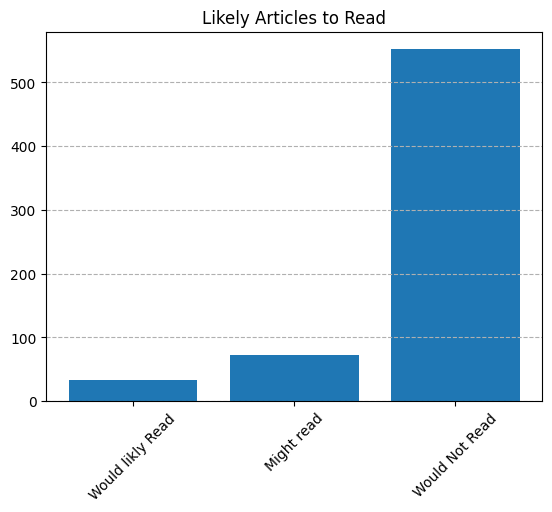

In [ ]:
headlines_unique , headlineslabels_count = np.unique(headlineslabels[:,1], return_counts=True)
print(headlines_unique , headlineslabels_count)
plt.bar(associated_tags, headlineslabels_count)
plt.xticks(associated_tags, rotation=45)
plt.title("Likely Articles to Read")
plt.grid(axis="y",linestyle='--')


In [ ]:
model_f = RandomForestClassifier(class_weight="balanced",max_features=15,max_depth=15,criterion="entropy",n_estimators = 100)

fitReport2(model_f)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         7
           1       0.00      0.00      0.00        11
           2       0.82      0.99      0.89        81

    accuracy                           0.81        99
   macro avg       0.61      0.33      0.30        99
weighted avg       0.74      0.81      0.73        99



array(['2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2'], dtype='<U146')

In [ ]:
model_b_y = fitReport2(model_b)
model_t_y = fitReport2(model_t)
model_m_y = fitReport2(model_m)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         7
           1       0.07      0.27      0.11        11
           2       0.77      0.51      0.61        81

    accuracy                           0.44        99
   macro avg       0.61      0.26      0.24        99
weighted avg       0.71      0.44      0.51        99

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.25      0.09      0.13        11
           2       0.83      0.95      0.89        81

    accuracy                           0.79        99
   macro avg       0.36      0.35      0.34        99
weighted avg       0.71      0.79      0.74        99

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.10      0.27      0.15        11
           2       0.78      0.60      0.68        81

    accuracy        

array(['2', '1', '2', '1', '2', '2', '2', '2', '2', '1', '1', '2', '2',
       '2', '2', '1', '1', '1', '2', '2', '1', '1', '1', '2', '1', '1',
       '2', '2', '0', '0', '1', '2', '0', '0', '2', '1', '1', '2', '2',
       '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '1', '1', '2',
       '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1',
       '2', '2', '0', '2', '2', '2', '2', '2', '1', '1', '1', '2', '1',
       '1', '2', '2', '2', '1', '2', '1', '2', '1', '2', '2', '2', '2',
       '1', '0', '2', '2', '2', '2', '2', '1'], dtype='<U1')

In [ ]:

headlines = headlines_preprocessed[:, 0]

def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

get_sentiment_polarity_vectorized = np.vectorize(get_sentiment_polarity)
sentiment_polarities = get_sentiment_polarity_vectorized(headlines)

sentiments = np.where(sentiment_polarities > 0, 'positive', np.where(sentiment_polarities < 0, 'negative', 'neutral'))

result_array = np.array(list(zip(headlines, sentiments, sentiment_polarities)),
                        dtype=[('Headline', 'U100'), ('Sentiment', 'U10'), ('Polarity', 'float64')])

print(result_array)

[('  sleep polar bear sociable penguin image shortlist wildlife photographer year people choice award ', 'negative', -8.33333333e-02)
 ('10 product use prevent bring bedbugs home vacation ', 'neutral',  0.00000000e+00)
 ('100 oped tell story 2010s ', 'neutral',  0.00000000e+00)
 ('13 climber kill 10 miss follow indonesian volcano eruption ', 'neutral',  0.00000000e+00)
 ('191 year old turtle celebrate birthday ', 'positive',  1.00000000e-01)
 ('2 people dead atmospheric river pummel northwest 9 inch rain danger not ', 'negative', -1.00000000e-01)
 ('2023 hot year record ', 'positive',  2.50000000e-01)
 ('2023 officially hot year record scientist report ', 'positive',  2.50000000e-01)
 ('26 voice free press matter ', 'positive',  4.00000000e-01)
 ('5 thing know dec 6 presidential race israel flood actor strike drug shortage ', 'neutral',  0.00000000e+00)
 ('5 thing know dec 7 presidential debate las vegas shoot israel foreign aid cigarette ', 'negative', -1.25000000e-01)
 ('6monthold be

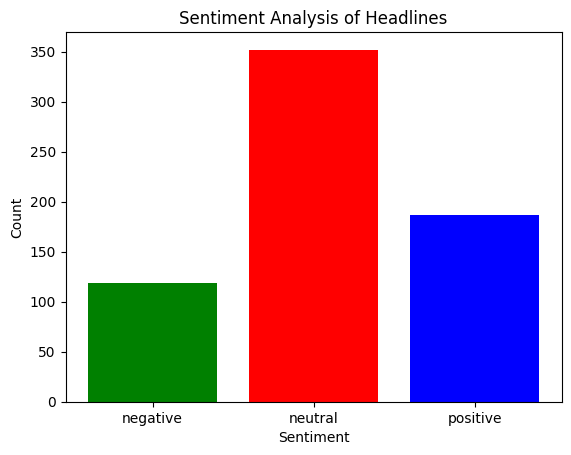

In [ ]:
unique_sentiments, counts = np.unique(sentiments, return_counts=True)

plt.bar(unique_sentiments, counts, color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()